<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#1. Data preparation


## Import employees and orders Excel files into two data frames

In [ ]:
pathEmployees = r'/content/drive/MyDrive/Data/Employees.xlsx'
pathOrders = r'/content/drive/MyDrive/Data/Orders.xlsx'
employees = pd.read_excel(pathEmployees)
orders = pd.read_excel(pathOrders)

In [ ]:
employees # visualize the employees dataset

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,PostalCode,Country,HomePhone,Extension
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,98401,USA,(206) 555-9482,3457
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,98033,USA,(206) 555-3412,3355
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,98052,USA,(206) 555-8122,5176
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,SW1 8JR,UK,(71) 555-4848,3453
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House,London,EC2 7JR,UK,(71) 555-7773,428
6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow,London,RG1 9SP,UK,(71) 555-5598,465
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,98105,USA,(206) 555-1189,2344
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452


In [ ]:
orders # visualize orders dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,EmployeeID
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,5
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,9
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,4
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,4
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,3
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,3


##Merge the two data frames using the EmployeeID 
###After merging the data frames, reset the index


In [ ]:
result = pd.merge(employees, orders, left_on='EmployeeID', right_on='EmployeeID', how='left')
result = result.reset_index(drop=True)
result

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,Country_x,HomePhone,Extension,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country_y,City_y,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
1,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,17,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176
2,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
3,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,21,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840
4,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,22,CA-2017-137330,2017-12-09,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9749,US-2015-140914,2015-11-11,2015-11-15,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Chicago,Illinois,60653.0,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.944,4,0.3,-56.9960
9990,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9868,US-2016-116981,2016-03-26,2016-03-28,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,New York,10009.0,East,OFF-AP-10000595,Office Supplies,Appliances,Disposable Triple-Filter Dust Bags,13.110,3,0.0,3.4086
9991,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9870,CA-2015-114195,2015-11-01,2015-11-03,First Class,EA-14035,Erin Ashbrook,Corporate,United States,Mason,Ohio,45040.0,East,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100
9992,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9890,CA-2018-166499,2018-03-19,2018-03-20,First Class,VG-21805,Vivek Grady,Corporate,United States,Lakewood,New Jersey,8701.0,East,OFF-AR-10002467,Office Supplies,Art,Dixon Ticonderoga Pencils,8.940,3,0.0,2.4138


## Ensure that the data type of each column is correct. None of the columns should have a data type Object. For example, if the column contains dates and times, then you should make sure the data type of that column is date/time.


In [ ]:
result.dtypes

EmployeeID                  int64
LastName                   object
FirstName                  object
Title                      object
TitleOfCourtesy            object
BirthDate          datetime64[ns]
HireDate           datetime64[ns]
Address                    object
City_x                     object
PostalCode                 object
Country_x                  object
HomePhone                  object
Extension                   int64
Row ID                      int64
Order ID                   object
Order Date         datetime64[ns]
Ship Date          datetime64[ns]
Ship Mode                  object
Customer ID                object
Customer Name              object
Segment                    object
Country_y                  object
City_y                     object
State                      object
Postal Code               float64
Region                     object
Product ID                 object
Category                   object
Sub-Category               object
Product Name  

Data/time columns in the dataset have the right datatypes

## Check for missing values. If there are missing values, suggest a way to deal with them.

In [ ]:
result.isna().sum()

EmployeeID          0
LastName            0
FirstName           0
Title               0
TitleOfCourtesy     0
BirthDate           0
HireDate            0
Address             0
City_x              0
PostalCode          0
Country_x           0
HomePhone           0
Extension           0
Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country_y           0
City_y              0
State               0
Postal Code        11
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
dtype: int64

There is only one column (Postal Code) with missing values. We can deal with missing values by dropping all the rows that have a missing value in the dataframe

In [ ]:
result = result.dropna()
result.isna().any().sum()

0

## Remove duplicate rows if there are any.


In [ ]:
result = result.drop_duplicates()
result

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,Country_x,HomePhone,Extension,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country_y,City_y,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
1,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,17,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176
2,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
3,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,21,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840
4,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,22,CA-2017-137330,2017-12-09,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9749,US-2015-140914,2015-11-11,2015-11-15,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Chicago,Illinois,60653.0,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.944,4,0.3,-56.9960
9990,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9868,US-2016-116981,2016-03-26,2016-03-28,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,New York,10009.0,East,OFF-AP-10000595,Office Supplies,Appliances,Disposable Triple-Filter Dust Bags,13.110,3,0.0,3.4086
9991,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9870,CA-2015-114195,2015-11-01,2015-11-03,First Class,EA-14035,Erin Ashbrook,Corporate,United States,Mason,Ohio,45040.0,East,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100
9992,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9890,CA-2018-166499,2018-03-19,2018-03-20,First Class,VG-21805,Vivek Grady,Corporate,United States,Lakewood,New Jersey,8701.0,East,OFF-AR-10002467,Office Supplies,Art,Dixon Ticonderoga Pencils,8.940,3,0.0,2.4138


## Calculate the number of days to ship an order
### The formula is as follow: Number of days to ship = Ship date – Order date


In [ ]:
result['Shipping Time'] = (result["Ship Date"]-result["Order Date"]).dt.days
result

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,Country_x,HomePhone,Extension,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country_y,City_y,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Time
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,3
1,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,17,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176,7
2,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,5
3,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,21,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840,5
4,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,USA,(206) 555-9857,5467,22,CA-2017-137330,2017-12-09,2017-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9749,US-2015-140914,2015-11-11,2015-11-15,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Chicago,Illinois,60653.0,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.944,4,0.3,-56.9960,4
9990,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9868,US-2016-116981,2016-03-26,2016-03-28,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,New York,10009.0,East,OFF-AP-10000595,Office Supplies,Appliances,Disposable Triple-Filter Dust Bags,13.110,3,0.0,3.4086,2
9991,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9870,CA-2015-114195,2015-11-01,2015-11-03,First Class,EA-14035,Erin Ashbrook,Corporate,United States,Mason,Ohio,45040.0,East,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100,2
9992,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,UK,(71) 555-4444,452,9890,CA-2018-166499,2018-03-19,2018-03-20,First Class,VG-21805,Vivek Grady,Corporate,United States,Lakewood,New Jersey,8701.0,East,OFF-AR-10002467,Office Supplies,Art,Dixon Ticonderoga Pencils,8.940,3,0.0,2.4138,1


## Provide descriptive (e.g., mean, min, max, standard deviation, count, etc.) of all numeric columns (i.e., Sales, Profits, Quantity, and Discount) of the data


In [ ]:
result.describe()

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,4.872483,2732.335671,4993.886207,55245.233297,229.216818,3.788741,0.156375,28.463592,3.958530
std,2.448726,1828.029492,2883.738990,32038.715955,621.909610,2.223566,0.206501,234.122107,1.748424
min,1.000000,428.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,3.000000,465.000000,2497.500000,23223.000000,17.280000,2.000000,0.000000,1.727100,3.000000
50%,5.000000,3355.000000,4993.000000,57103.000000,54.384000,3.000000,0.200000,8.643600,4.000000
75%,7.000000,3457.000000,7489.500000,90008.000000,209.905000,5.000000,0.200000,29.315200,5.000000
max,9.000000,5467.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000


Statistical summary of the datasets numerical columns

## Provide the correlation matrix

In [ ]:
result.corr()

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
EmployeeID,1.000000,-0.776560,-0.016210,0.006246,0.008689,0.002411,0.001681,0.009294,-0.009425
Extension,-0.776560,1.000000,0.019171,-0.005357,-0.005303,-0.000731,0.002852,-0.006882,0.008572
Row ID,-0.016210,0.019171,1.000000,0.011644,-0.002868,-0.004248,0.014447,0.011388,-0.001600
Postal Code,0.006246,-0.005357,0.011644,1.000000,-0.022346,0.013376,0.057243,-0.028751,-0.010072
Sales,0.008689,-0.005303,-0.002868,-0.022346,1.000000,0.200220,-0.027494,0.477418,-0.007238
Quantity,0.002411,-0.000731,-0.004248,0.013376,0.200220,1.000000,0.008920,0.065446,0.018387
Discount,0.001681,0.002852,0.014447,0.057243,-0.027494,0.008920,1.000000,-0.219182,0.000283
Profit,0.009294,-0.006882,0.011388,-0.028751,0.477418,0.065446,-0.219182,1.000000,-0.004634
Shipping Time,-0.009425,0.008572,-0.001600,-0.010072,-0.007238,0.018387,0.000283,-0.004634,1.000000


## Assume that an outlier is a value that is above (mean + 3*standard deviation). Find all the outliers


### Based on Quantity

In [ ]:
mean = result.Quantity.mean()
std = result.Quantity.std()
print("Mean:", mean,"\nStandard Deviation:", std)

Mean: 3.788740859461084 
Standard Deviation: 2.223565849805139


In [ ]:
resultQuantityNumeric = result[['Quantity']]
resultQuantityNumeric[(np.abs(resultQuantityNumeric) > (mean+3*std)).any(1)]

,Quantity
17,14
21,11
152,14
177,13
278,13
...,...
9646,14
9716,11
9897,11
9916,14


### Based on Sales

In [ ]:
mean = result.Sales.mean()
std = result.Sales.std()
print("Mean:", mean,"\nStandard Deviation:", std)

Mean: 229.2168176199494 
Standard Deviation: 621.9096098834057


In [ ]:
resultSalesNumeric = result[['Sales']]
resultSalesNumeric[(np.abs(resultSalesNumeric) > (mean+3*std)).any(1)]

,Sales
33,3059.982
48,2735.952
51,2999.950
105,2715.930
116,4899.930
...,...
9684,10499.970
9719,2249.910
9758,2999.950
9889,2625.120


### Based on Profits

In [ ]:
mean = result.Profit.mean()
std = result.Profit.std()
print("Mean:", mean,"\nStandard Deviation:", std)

Mean: 28.463592447160135 
Standard Deviation: 234.12210671980182


In [ ]:
resultProfitNumeric = result[['Profit']]
resultProfitNumeric[(np.abs(resultProfitNumeric) > (mean+3*std)).any(1)]

,Profit
51,1379.9770
105,1276.4871
116,2400.9657
124,-1850.9464
538,843.1706
...,...
9684,5039.9856
9758,1439.9760
9820,899.9820
9889,735.0336


#2. Data exploration

## Return the average and the total sales per state

In [ ]:
resultState = result.set_index('State')
resultState.mean(level='State').sort_values(by=['Sales'], ascending=False) # average sales

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
State,,,,,,,,,
Wyoming,5.000000,3453.000000,5870.000000,82001.000000,1603.136000,4.000000,0.200000,100.196000,5.000000
Nevada,5.564103,2026.666667,5731.948718,89136.846154,428.951333,4.307692,0.061538,85.045279,4.384615
Rhode Island,5.196429,2756.267857,5453.303571,2908.535714,404.070643,3.553571,0.021429,130.100523,3.285714
Montana,5.066667,2219.000000,4095.866667,59491.733333,372.623467,3.733333,0.066667,122.221900,4.600000
Indiana,4.825503,2956.463087,4891.073826,46923.503356,359.431946,3.879195,0.000000,123.375411,4.335570
Missouri,5.196970,2435.287879,4927.969697,65126.696970,336.441667,3.818182,0.000000,97.518341,4.075758
Minnesota,4.988764,2794.617978,3557.808989,55418.247191,335.541011,3.719101,0.000000,121.608847,4.483146
Alabama,5.049180,2480.655738,3997.967213,35994.573770,319.846557,4.196721,0.000000,94.865989,4.114754
Virginia,4.741071,2684.142857,5438.111607,22876.495536,315.342500,3.986607,0.000000,83.026564,3.843750


In [ ]:
resultState.sum(level='State').sort_values(by=['Sales'], ascending=False) # Total sales

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
State,,,,,,,,,
California,9703,5468657,10137449,184382639.0,457687.6315,7667,145.60,76381.3871,7738
New York,5543,3007767,5452096,11835721.0,310876.2710,4224,62.40,74038.5486,4575
Texas,4928,2604054,5085541,75747693.0,170188.0458,3724,364.64,-25729.3563,3872
Washington,2520,1371556,2584458,49661687.0,138641.2700,1883,32.40,33402.6517,2011
Pennsylvania,2868,1652234,2768523,11190565.0,116511.9140,2153,192.90,-15559.9603,2277
Florida,1771,1132546,1958255,12640225.0,89473.7080,1379,114.65,-3399.3017,1512
Illinois,2318,1431493,2571481,29873772.0,80166.1010,1845,191.90,-12607.8870,2027
Ohio,2277,1236671,2355994,20579836.0,78258.1360,1759,152.40,-16971.3766,1620
Michigan,1219,713213,1200167,12356103.0,76269.6140,946,1.80,24463.1876,1045


### Which state has the highest average sales?

Wyoming

###Which state has the highest total sales?

California

## Return the average and the total profits per state


In [ ]:
resultState.mean(level='State').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
State,,,,,,,,,
Rhode Island,5.196429,2756.267857,5453.303571,2908.535714,404.070643,3.553571,0.021429,130.100523,3.285714
Indiana,4.825503,2956.463087,4891.073826,46923.503356,359.431946,3.879195,0.000000,123.375411,4.335570
Montana,5.066667,2219.000000,4095.866667,59491.733333,372.623467,3.733333,0.066667,122.221900,4.600000
Minnesota,4.988764,2794.617978,3557.808989,55418.247191,335.541011,3.719101,0.000000,121.608847,4.483146
District of Columbia,4.000000,3322.400000,1791.800000,20016.000000,286.502000,4.000000,0.000000,105.958930,5.700000
Delaware,4.781250,2888.843750,5253.854167,19755.250000,285.948635,3.822917,0.006250,103.930988,4.270833
Wyoming,5.000000,3453.000000,5870.000000,82001.000000,1603.136000,4.000000,0.200000,100.196000,5.000000
Missouri,5.196970,2435.287879,4927.969697,65126.696970,336.441667,3.818182,0.000000,97.518341,4.075758
Michigan,4.780392,2796.913725,4706.537255,48455.305882,299.096525,3.709804,0.007059,95.934069,4.098039


In [ ]:
resultState.sum(level='State').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
State,,,,,,,,,
California,9703,5468657,10137449,184382639.0,457687.6315,7667,145.60,76381.3871,7738
New York,5543,3007767,5452096,11835721.0,310876.2710,4224,62.40,74038.5486,4575
Washington,2520,1371556,2584458,49661687.0,138641.2700,1883,32.40,33402.6517,2011
Michigan,1219,713213,1200167,12356103.0,76269.6140,946,1.80,24463.1876,1045
Virginia,1062,601248,1218137,5124335.0,70636.7200,893,0.00,18597.9504,861
Indiana,719,440513,728770,6991602.0,53555.3600,578,0.00,18382.9363,646
Georgia,883,507915,883590,5685480.0,49095.8400,705,0.00,16250.0433,706
Kentucky,634,395183,698921,5725336.0,36591.7500,523,0.00,11199.6966,536
Minnesota,444,248721,316645,4932224.0,29863.1500,331,0.00,10823.1874,399


### Which state has the highest average profits?


Rhode Island

### Which state has the highest total profits?


California

## Return the average and the total sales per sub-category


In [ ]:
resultSubCategory = result.set_index('Sub-Category')
resultSubCategory.mean(level='Sub-Category').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
Sub-Category,,,,,,,,,
Copiers,5.205882,2665.544118,5230.308824,56962.897059,2198.941618,3.441176,0.161765,817.909190,3.617647
Machines,5.121739,2700.826087,4881.982609,55344.939130,1645.553313,3.826087,0.306087,29.432669,3.747826
Tables,4.686520,2774.100313,4929.981191,58331.749216,648.794771,3.890282,0.261285,-55.565771,3.896552
Chairs,4.948052,2714.887987,5058.811688,56705.878247,532.035557,3.819805,0.170455,42.875595,3.905844
Bookcases,4.594714,2833.436123,5051.951542,56238.462555,486.674433,3.801762,0.212070,-19.760718,3.810573
Phones,4.914414,2759.605856,4940.524775,53932.170045,370.171514,3.698198,0.154730,49.751234,4.002252
Storage,4.995266,2632.315976,4872.781065,54725.813018,263.052447,3.721893,0.074793,24.700723,3.975148
Supplies,4.868421,2752.089474,5229.231579,55966.094737,245.650200,3.405263,0.076842,-6.258418,4.015789
Appliances,4.606452,2922.015054,5157.774194,54290.602151,230.084346,3.711828,0.166882,38.679532,3.987097


In [ ]:
resultSubCategory.sum(level='Sub-Category').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
Sub-Category,,,,,,,,,
Phones,4364,2450530,4387186,47891767.0,328712.3040,3284,137.40,44179.0956,3554
Chairs,3048,1672371,3116228,34930821.0,327733.9030,2353,105.00,26411.3663,2406
Storage,4221,2224307,4117500,46243312.0,222279.3180,3145,63.20,20872.1110,3359
Tables,1495,884938,1572664,18607828.0,206965.5320,1241,83.35,-17725.4811,1243
Binders,7431,4103922,7633935,83626398.0,203412.7330,5974,567.00,30221.7633,6125
Machines,589,310595,561428,6364668.0,189238.6310,440,35.20,3384.7569,431
Accessories,3836,2067819,3916698,44457618.0,167075.3080,2967,60.80,41825.9844,3004
Copiers,354,181257,355661,3873477.0,149528.0300,234,11.00,55617.8249,246
Bookcases,1043,643190,1146793,12766131.0,110475.0963,863,48.14,-4485.6830,865


###Which category has the highest average sales?

Copiers

###Which category has the highest total sales?


Phones

## Return the average and the total profits per sub-category


In [ ]:
resultSubCategory.mean(level='Sub-Category').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
Sub-Category,,,,,,,,,
Copiers,5.205882,2665.544118,5230.308824,56962.897059,2198.941618,3.441176,0.161765,817.909190,3.617647
Accessories,4.962484,2675.056921,5066.879690,57513.089263,216.138820,3.838292,0.078655,54.108647,3.886158
Phones,4.914414,2759.605856,4940.524775,53932.170045,370.171514,3.698198,0.154730,49.751234,4.002252
Chairs,4.948052,2714.887987,5058.811688,56705.878247,532.035557,3.819805,0.170455,42.875595,3.905844
Appliances,4.606452,2922.015054,5157.774194,54290.602151,230.084346,3.711828,0.166882,38.679532,3.987097
Machines,5.121739,2700.826087,4881.982609,55344.939130,1645.553313,3.826087,0.306087,29.432669,3.747826
Envelopes,5.272727,2481.683794,4737.205534,52649.498024,65.116055,3.577075,0.080632,27.522600,4.015810
Paper,4.829678,2743.960526,5019.967105,55766.377924,57.300443,3.781433,0.075000,24.861283,3.888158
Storage,4.995266,2632.315976,4872.781065,54725.813018,263.052447,3.721893,0.074793,24.700723,3.975148


In [ ]:
resultSubCategory.sum(level='Sub-Category').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
Sub-Category,,,,,,,,,
Copiers,354,181257,355661,3873477.0,149528.0300,234,11.00,55617.8249,246
Phones,4364,2450530,4387186,47891767.0,328712.3040,3284,137.40,44179.0956,3554
Accessories,3836,2067819,3916698,44457618.0,167075.3080,2967,60.80,41825.9844,3004
Paper,6607,3753738,6867315,76288405.0,78387.0060,5173,102.60,34010.2353,5319
Binders,7431,4103922,7633935,83626398.0,203412.7330,5974,567.00,30221.7633,6125
Chairs,3048,1672371,3116228,34930821.0,327733.9030,2353,105.00,26411.3663,2406
Storage,4221,2224307,4117500,46243312.0,222279.3180,3145,63.20,20872.1110,3359
Appliances,2142,1358737,2398365,25245130.0,106989.2210,1726,77.60,17985.9822,1854
Furnishings,4689,2591450,4842624,51880430.0,91705.1640,3563,132.40,13059.1436,3790


### Which category has the highest average profits?


Copiers

### Which category has the highest total profits?

Copiers

## Return the number of Order per Employee

In [ ]:
resultEmployee = result[['FirstName', 'LastName', 'EmployeeID']]
resultEmployee.value_counts(ascending=False)

FirstName  LastName   EmployeeID
Robert     King       7             1637
Andrew     Fuller     2             1184
Steven     Buchanan   5             1141
Janet      Leverling  3             1119
Laura      Callahan   8             1110
Michael    Suyama     6             1096
Nancy      Davolio    1             1084
Margaret   Peacock    4             1059
Anne       Dodsworth  9              553
dtype: int64

### What is the name of the employee with the highest number of orders?

Robert King

## Return the average number of days to ship on order per state

In [ ]:
resultState.mean(level='State').sort_values(by=['Shipping Time'], ascending=True)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
State,,,,,,,,,
North Dakota,6.000000,1862.428571,5256.571429,58103.000000,131.415714,4.285714,0.000000,32.878529,2.857143
West Virginia,6.250000,1202.750000,8293.750000,26003.000000,302.456000,4.500000,0.075000,46.480400,3.000000
Louisiana,4.642857,2609.785714,4133.928571,70777.357143,219.453095,3.714286,0.000000,52.288150,3.047619
Rhode Island,5.196429,2756.267857,5453.303571,2908.535714,404.070643,3.553571,0.021429,130.100523,3.285714
Ohio,4.855011,2636.825160,5023.441365,43880.247335,166.861697,3.750533,0.324947,-36.186304,3.454158
Nebraska,4.578947,3145.973684,5404.842105,68121.421053,196.445526,3.578947,0.000000,53.607742,3.500000
South Carolina,5.761905,2128.547619,4621.309524,29287.333333,201.945476,4.095238,0.000000,42.120395,3.595238
Connecticut,5.170732,2669.109756,5419.646341,6475.670732,163.223866,3.426829,0.007317,42.823071,3.597561
Idaho,4.380952,2963.238095,6163.190476,83462.333333,208.689810,3.047619,0.085714,39.367767,3.666667


### Which state has the lowest number of days to ship an order?

North Dakota

## Return the average and the total sales per order date (in years)

In [ ]:
result["OrderYear"] = result["Order Date"].dt.year
resultOrderYear = result.set_index('OrderYear')
resultOrderYear.mean(level='OrderYear').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
OrderYear,,,,,,,,,
2015,4.890115,2698.725038,4969.400401,56834.544405,242.974159,3.803813,0.158284,24.858994,3.996989
2017,4.835850,2762.607820,4933.240805,54580.638018,234.703267,3.798297,0.154983,31.361246,3.948897
2016,4.929524,2712.607619,4951.751905,52951.157619,221.624957,3.795714,0.155757,28.774608,4.018095
2018,4.854249,2741.474448,5082.767161,56263.289386,221.461459,3.767765,0.156704,28.175172,3.905050


In [ ]:
resultOrderYear.sum(level='OrderYear').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
OrderYear,,,,,,,,,
2018,16053,9066056,16808711,186062698.0,732373.0452,12460,518.22,93175.2937,12914
2017,12491,7135816,12742561,140981788.0,606238.5380,9811,400.32,81006.0989,10200
2015,9746,5378559,9904015,113271247.0,484247.4981,7581,315.46,49543.9741,7966
2016,10352,5696476,10398679,111197431.0,465412.4090,7971,327.09,60426.6767,8438


### Which year has the highest average sales?


2015

### Which year has the highest total sales?

2018

## Return the average and the total profits per order date (in years)

In [ ]:
resultOrderYear.mean(level='OrderYear').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
OrderYear,,,,,,,,,
2017,4.835850,2762.607820,4933.240805,54580.638018,234.703267,3.798297,0.154983,31.361246,3.948897
2016,4.929524,2712.607619,4951.751905,52951.157619,221.624957,3.795714,0.155757,28.774608,4.018095
2018,4.854249,2741.474448,5082.767161,56263.289386,221.461459,3.767765,0.156704,28.175172,3.905050
2015,4.890115,2698.725038,4969.400401,56834.544405,242.974159,3.803813,0.158284,24.858994,3.996989


In [ ]:
resultOrderYear.sum(level='OrderYear').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time
OrderYear,,,,,,,,,
2018,16053,9066056,16808711,186062698.0,732373.0452,12460,518.22,93175.2937,12914
2017,12491,7135816,12742561,140981788.0,606238.5380,9811,400.32,81006.0989,10200
2016,10352,5696476,10398679,111197431.0,465412.4090,7971,327.09,60426.6767,8438
2015,9746,5378559,9904015,113271247.0,484247.4981,7581,315.46,49543.9741,7966


### Which year has the highest average profits?

2017

### Which year has the highest total profits?

2018

## Answer the following questions:

### Which state is the most profitable in 2017?


In [ ]:
result[result.OrderYear == 2017].sort_values(by=['Profit'], ascending=False).State

9079         Indiana
5482        Michigan
8101        Virginia
7968    Rhode Island
116         New York
            ...     
3428         Arizona
3220    Pennsylvania
7963        Colorado
124            Texas
7984            Ohio
Name: State, Length: 2583, dtype: object

Indiana

### Which sub-category is the most profitable in the State of California in 2015?


In [ ]:
resultCalifornia = result[result.State == "California"]
resultCalifornia[resultCalifornia.OrderYear == 2015].sort_values(by=['Profit'], ascending=False)["Sub-Category"]

63        Copiers
4138     Machines
4835        Paper
9140      Storage
7868      Storage
          ...    
2705    Bookcases
6056       Tables
7394       Chairs
6981       Chairs
4029       Tables
Name: Sub-Category, Length: 415, dtype: object

Copiers

### What are the top 5 customers in terms of sales?


In [ ]:
resultCustomer = result.set_index('Customer Name')
resultCustomer.sum(level='Customer Name').sort_values(by=['Sales'], ascending=False).head(5)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time,OrderYear
Customer Name,,,,,,,,,,
Sean Miller,68,46298,77545,482091.0,25043.050,50,3.7,-1980.7393,64,30237
Tamara Chand,69,23095,75386,586036.0,19052.218,42,1.4,8981.3239,71,24194
Raymond Buch,99,36727,69857,914035.0,15117.339,71,1.7,6976.0959,52,36312
Tom Ashbrook,41,30957,48932,375032.0,14595.620,36,0.8,4703.7883,39,20167
Adrian Barton,96,49456,130088,1359311.0,14473.571,73,4.8,5444.8055,89,40339


1. Sean Miller	
2. Tamara Chand	
3. Raymond Buch	
4. Tom Ashbrook	
5. Adrian Barton

### What are the top 5 products in terms of sales?

In [ ]:
resultProduct = result.set_index('Product Name')
resultProduct.sum(level='Product Name').sort_values(by=['Sales'], ascending=False).head(5)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Time,OrderYear
Product Name,,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,33,11072,28222,194875.0,61599.824,20,0.6,2.519993e+04,20,10088
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,42,29973,61859,562064.0,27453.384,31,2.4,7.753039e+03,42,20167
Cisco TelePresence System EX90 Videoconferencing Unit,4,5176,2698,32216.0,22638.480,6,0.5,-1.811078e+03,5,2015
HON 5400 Series Task Chairs for Big and Tall,45,17379,44560,448062.0,21870.576,39,1.6,3.979039e-13,25,16132
GBC DocuBind TL300 Electric Binding System,46,34534,64915,381549.0,19823.479,37,3.3,2.233505e+03,53,22183


1. Canon imageCLASS 2200 Advanced Copier	
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind	
3. Cisco TelePresence System EX90 Videoconferencing Unit	
4. HON 5400 Series Task Chairs for Big and Tall
5. GBC DocuBind TL300 Electric Binding System

#3. Data Visualization

## Create a bar plot that shows total sales per sub-category

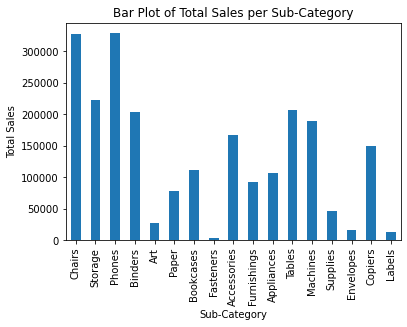

In [ ]:
resultSubCategory = result.set_index('Sub-Category')
resultSubCategory = resultSubCategory.sum(level='Sub-Category')
resultSubCategory['Sales'].plot(kind='bar', title="Bar Plot of Total Sales per Sub-Category", ylabel="Total Sales")

## Create a bar plot that shows total sales per state


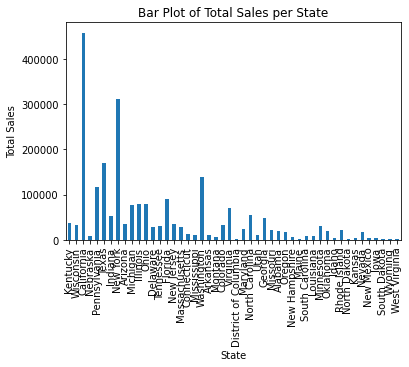

In [ ]:
resultState = result.set_index('State')
resultState = resultState.sum(level='State')
resultState['Sales'].plot(kind='bar', title="Bar Plot of Total Sales per State", ylabel="Total Sales")

## Create a histogram of Quantity



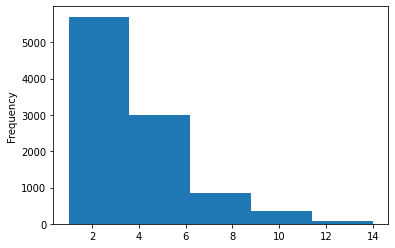

In [ ]:
result['Quantity'].plot.hist(bins=5) # Histogram of the Quantity column of the dataset column with 5 bins

## Plot how total sales change over time
### Use year-month (e.g., Jan 2017, Feb 2017, March 2017, etc.) of Order Date as time.


[Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '2015-05'),
 Text(0, 0, '2015-06'),
 Text(0, 0, '2015-07'),
 Text(0, 0, '2015-08'),
 Text(0, 0, '2015-09'),
 Text(0, 0, '2015-10'),
 Text(0, 0, '2015-11'),
 Text(0, 0, '2015-12'),
 Text(0, 0, '2016-01'),
 Text(0, 0, '2016-02'),
 Text(0, 0, '2016-03'),
 Text(0, 0, '2016-04'),
 Text(0, 0, '2016-05'),
 Text(0, 0, '2016-06'),
 Text(0, 0, '2016-07'),
 Text(0, 0, '2016-08'),
 Text(0, 0, '2016-09'),
 Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09'),
 Text(0, 0, '2017-10'),
 Text(0, 0, '2017-11'),
 Text(0, 0, '2017-12'),
 Text(0, 0, '2018-01'),
 Text(0, 0, '2018-02'),
 Text(0, 0, '2018-03'),
 Text(0, 0, '2018-04'),
 Text(0, 0, '2018-05'),
 Text(0, 0, '201

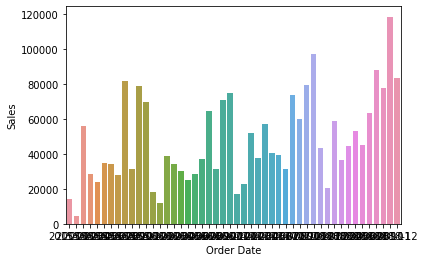

In [ ]:
resultYearly = result.groupby(result['Order Date'].astype("datetime64[M]"))

totalAGG = resultYearly.sum().reset_index()

g = sns.barplot(data=totalAGG, x='Order Date',  y='Sales')

g.set_xticklabels(totalAGG['Order Date'].values.astype("datetime64[M]"))

## Plot how total sales change over time for the state of California
### Use year-month (e.g., Jan 2017, Feb 2017, March 2017, etc.) of Order Date as time.


[Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '2015-05'),
 Text(0, 0, '2015-06'),
 Text(0, 0, '2015-07'),
 Text(0, 0, '2015-08'),
 Text(0, 0, '2015-09'),
 Text(0, 0, '2015-10'),
 Text(0, 0, '2015-11'),
 Text(0, 0, '2015-12'),
 Text(0, 0, '2016-01'),
 Text(0, 0, '2016-02'),
 Text(0, 0, '2016-03'),
 Text(0, 0, '2016-04'),
 Text(0, 0, '2016-05'),
 Text(0, 0, '2016-06'),
 Text(0, 0, '2016-07'),
 Text(0, 0, '2016-08'),
 Text(0, 0, '2016-09'),
 Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09'),
 Text(0, 0, '2017-10'),
 Text(0, 0, '2017-11'),
 Text(0, 0, '2017-12'),
 Text(0, 0, '2018-01'),
 Text(0, 0, '2018-02'),
 Text(0, 0, '2018-03'),
 Text(0, 0, '2018-04'),
 Text(0, 0, '2018-05'),
 Text(0, 0, '201

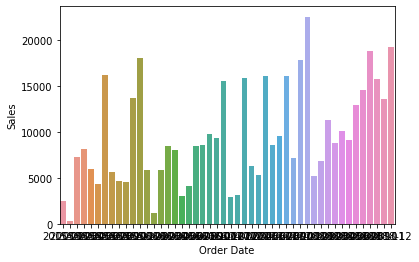

In [ ]:
resultCaliforniaYearly = result[result.State == "California"].groupby(result['Order Date'].astype("datetime64[M]"))

totalAGG = resultCaliforniaYearly.sum().reset_index()

g = sns.barplot(data=totalAGG, x='Order Date',  y='Sales')

g.set_xticklabels(totalAGG['Order Date'].values.astype("datetime64[M]"))

##Plot how total sales change over time for the state of Florida
### Use year-month (e.g., Jan 2017, Feb 2017, March 2017, etc.) of Order Date as time.

[Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '2015-05'),
 Text(0, 0, '2015-06'),
 Text(0, 0, '2015-07'),
 Text(0, 0, '2015-08'),
 Text(0, 0, '2015-09'),
 Text(0, 0, '2015-10'),
 Text(0, 0, '2015-11'),
 Text(0, 0, '2015-12'),
 Text(0, 0, '2016-01'),
 Text(0, 0, '2016-03'),
 Text(0, 0, '2016-04'),
 Text(0, 0, '2016-05'),
 Text(0, 0, '2016-06'),
 Text(0, 0, '2016-07'),
 Text(0, 0, '2016-08'),
 Text(0, 0, '2016-09'),
 Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-05'),
 Text(0, 0, '2017-06'),
 Text(0, 0, '2017-07'),
 Text(0, 0, '2017-08'),
 Text(0, 0, '2017-09'),
 Text(0, 0, '2017-10'),
 Text(0, 0, '2017-11'),
 Text(0, 0, '2017-12'),
 Text(0, 0, '2018-01'),
 Text(0, 0, '2018-02'),
 Text(0, 0, '2018-03'),
 Text(0, 0, '2018-04'),
 Text(0, 0, '2018-05'),
 Text(0, 0, '2018-06'),
 Text(0, 0, '2018-07'),
 Text(0, 0, '201

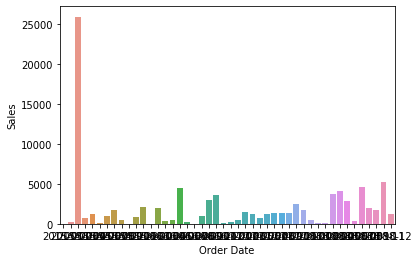

In [ ]:
resultFloridaYearly = result[result.State == "Florida"].groupby(result['Order Date'].astype("datetime64[M]"))

totalAGG = resultFloridaYearly.sum().reset_index()

g = sns.barplot(data=totalAGG, x='Order Date',  y='Sales')

g.set_xticklabels(totalAGG['Order Date'].values.astype("datetime64[M]"))